Installation of fuzzy library

In [ ]:
!pip install fuzzy

  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp36-cp36m-linux_x86_64.whl size=160962 sha256=19bfaa381334ea43f244b104a96d884760851d960df7532f159c383058038e6b
  Stored in directory: /root/.cache/pip/wheels/79/f7/14/b7e20855729780e85322529469b2d1eadfd940e83d981373cc
Successfully built fuzzy


Exploring fuuzy.nysiis()

In [9]:
#importing the fuzzy module
import fuzzy

# Exploring the output of fuzzy.nysiis
print(fuzzy.nysiis('fuzzy'))
print(fuzzy.nysiis('rajvi'))
print(fuzzy.nysiis('know'))
print(fuzzy.nysiis('no'))
print(fuzzy.nysiis('colour'))
print(fuzzy.nysiis('color'))
print(fuzzy.nysiis('rajvi'))
print(fuzzy.nysiis('rajv'))
print(fuzzy.nysiis('tomorrow'))
print(fuzzy.nysiis('tommorrow'))

FASY
RAJV
N
N
CALAR
CALAR
RAJV
RAJV
TANAR
TANAR


In [7]:
# Importing the pandas module
import pandas

# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited
author_df = pandas.read_csv(r'nytkids_yearly.csv', delimiter=';')

# Looping through author_df['Author'] to extract the authors first names
first_name = []
for name in author_df['Author']:
    name = name.split(' ') #string will be converted to list
    first_name.append(name[0])

# Adding first_name as a column to author_df
author_df['first_name'] = first_name

# Checking out the first few rows of author_df
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


In [10]:
# Importing numpy
import numpy as np

# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []
for name in first_name:
    nysiis_name.append(fuzzy.nysiis(name))

# Adding nysiis_name as a column to author_df
author_df['nysiis_name'] = nysiis_name

# Printing out the difference between unique firstnames and unique nysiis_names:
diff_names = len(np.unique(author_df.first_name)) - \
    len(np.unique(author_df.nysiis_name))
print('There are ' + str(diff_names) +
      ' more unqiue values for first_name than nysiis_name')

There are 25 more unqiue values for first_name than nysiis_name


In [12]:
# Reading in babynames_nysiis.csv, which is semicolon delimited.
babies_df = pandas.read_csv('babynames_nysiis.csv', delimiter=';')

# Looping through babies_df to and filling up gender
gender = []
for index in range(len(babies_df['babynysiis'])):
    if babies_df.perc_female[index] > babies_df.perc_male[index]:
        gender.append('F')
    elif babies_df.perc_female[index] < babies_df.perc_male[index]:
        gender.append('M')
    else:
        gender.append('N')

# Adding a gender column to babies_df
babies_df['gender'] = gender

# Printing out the first few rows of babies_df
babies_df.head()

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M


In [14]:
# This function returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []
for name in author_df['nysiis_name']:
    nloc = locate_in_list(list(babies_df['babynysiis']), name)
    if nloc == -1:
        author_gender.append('Unknown')
    else:
        author_gender.append(babies_df['gender'][nloc])

# Adding author_gender to the author_df
author_df['author_gender'] = author_gender

# Counting the author's genders
author_df['author_gender'].value_counts()

'''

def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

author_gender = []

for index in author_df['nysiis_name']:
    nloc = locate_in_list(list(babies_df['babynysiis']), name)
    if nloc == -1:
        author_gender.append('Unknown')
    else:
        author_gender.append(babies_df['gender'][nloc])
    
author_df['author_gender'] = author_gender
author_df['author_gender'].value_counts()
'''

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

In [15]:
# Creating a list of unique years, sorted in ascending order.
years = list(author_df.Year.unique())
#author_df.year.nunique(dropna = True) 

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for yr in years:
    males_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'M') & (author_df["Year"] == yr)]))
    females_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'F') & (author_df["Year"] == yr)]))
    unknown_by_yr.append(len(
        author_df[(author_df["author_gender"] == 'Unknown') & (author_df["Year"] == yr)]))

# Printing out yearly values to examine changes over time
data = np.array([males_by_yr, females_by_yr, unknown_by_yr])
headers = ['males', 'females', 'unknowns']
pandas.DataFrame(data, headers, years)

# Creating a list of unique years, sorted in ascending order.
years = list(np.unique(author_df.Year))

males_by_yr = []
females_by_yr = []
unknown_by_yr = []

# Looping through years to find the number of male, female and unknown authors per year
for yr in years:
    males_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'M') & (author_df["Year"] == yr)]))
    females_by_yr.append(
        len(author_df[(author_df["author_gender"] == 'F') & (author_df["Year"] == yr)]))
    unknown_by_yr.append(len(
        author_df[(author_df["author_gender"] == 'Unknown') & (author_df["Year"] == yr)]))

data = np.array([males_by_yr, females_by_yr, unknown_by_yr])
headers = ['males', 'females', 'unknowns']
pandas.DataFrame(data, headers, years)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,8,19,27,21,21,11,21,18,25,20
females,15,45,48,51,46,51,34,30,32,43
unknowns,1,3,0,1,0,2,1,0,0,1


Text(0, 0.5, 'unknown_year')

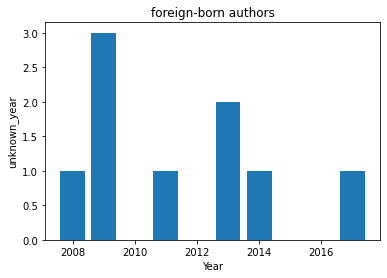

In [16]:
# Importing matplotlib
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Plotting the bar chart
#plt.plot(years, unknown_by_yr)
plt.bar(years, unknown_by_yr)
plt.title('foreign-born authors')
plt.xlabel('Year')
plt.ylabel('unknown_year')

Text(0.5, 1.0, 'Authors by Gender')

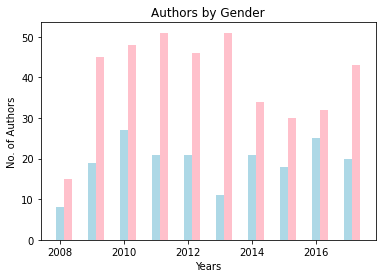

In [17]:
# Creating a new list, where 0.25 is added to each year
years_shifted = [year + 0.25 for year in years]

# Plotting males_by_yr by year
plt.bar(years, males_by_yr, width = 0.25, color = 'lightblue')

# Plotting females_by_yr by years_shifted
plt.bar(years_shifted, females_by_yr, width = 0.25, color = 'pink')

plt.xlabel('Years')
plt.ylabel('No. of Authors')
plt.title('Authors by Gender')